# Indebtedness Case Orientation

In [21]:
# Main packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Tools
from collections import defaultdict
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder

## Adding methods and attributes to pandas DataFrame

### Methods declarations

In [22]:
def fit_transform(self):  
    # Encoding all the features as int, and saving an encoder by column
    return self.apply(lambda x: self.dict_encoder[x.name].fit_transform(x))

In [23]:
def inverse_transform(self):
    # Retriving value before encoding
    return self.apply(lambda x: self.dict_encoder[x.name].inverse_transform(x))

In [24]:
def clean(self):
    # Filling NAs
    return self.fillna(self.mean()).fillna('unknown')

### Overriting pandas Dataframe

In [25]:
methods_and_attributes = {
    'clean' : clean,
    'dict_encoder' : defaultdict(LabelEncoder),
    'fit_transform' : fit_transform,
    'inverse_transform' : inverse_transform
}

In [26]:
for ma in methods_and_attributes.keys():
    setattr(pd.DataFrame, ma, methods_and_attributes[ma])

## Data processing functions

In [27]:
# Importing data
test = pd.read_csv('data/test.csv', index_col='id', na_values='\\N')
train = pd.read_csv('data/train.csv', index_col='id', na_values='\\N')

In [28]:
# Cleaning dataframes
train = train.clean()
test = test.clean()

In [33]:
# Encoding dataframes
train = train.fit_transform()
test = test.first_transform()

Splitting train to create new dataframes, in order to be able to do local tests.

In [35]:
# Splitting it into X and y parts
X_train = train.drop('ORIENTATION', axis=1)
y_train = train['ORIENTATION']

# Creating local train and test
local_X_train, local_X_test, local_y_train, local_y_test = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# print(f"local_X_train before : {type(local_X_train)}")

# # Converting those DataFrames to DataFrameWrappers
# elements = [local_X_train, local_X_test, local_y_train, local_y_test]
# for i in range(len(elements)):
#     print(type(elements[i]))
#     elements[i] = DataFrameWrapper(elements[i])
#     print(type(elements[i]))

# print(f"local_X_train after : {type(elements[i])}")

## Training Part

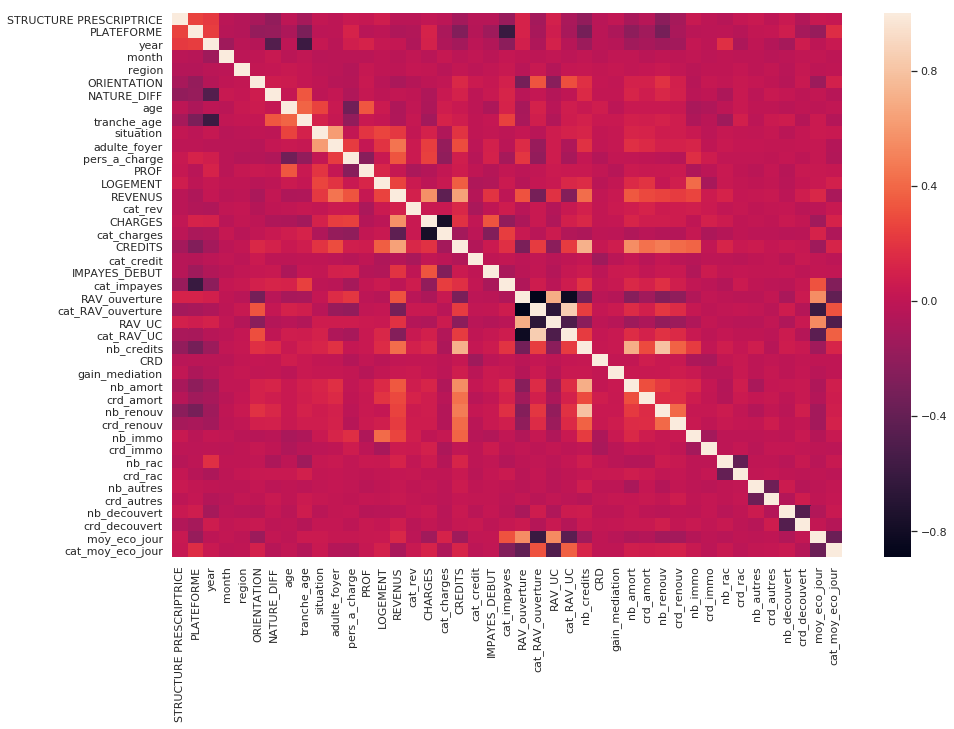

In [38]:
corr = train.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [48]:
indices = np.where((corr > 0.3) | (corr < -0.7))
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices) \
    if x != y and x < y and (corr.index[x] == 'ORIENTATION' or corr.index[y] == 'ORIENTATION')]
indices

[('ORIENTATION', 'cat_RAV_ouverture'), ('ORIENTATION', 'cat_RAV_UC')]

In [49]:
pca = PCA()
pca.fit(local_X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

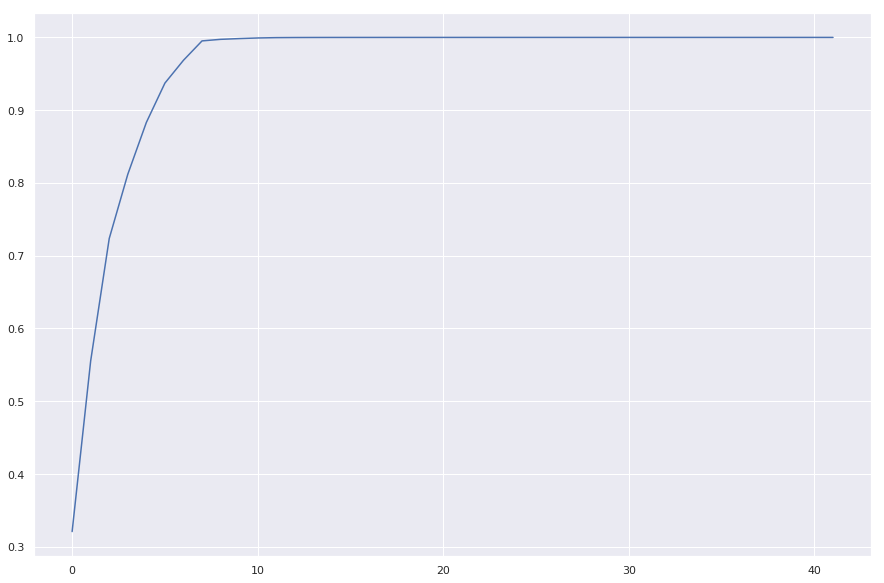

In [50]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

In [56]:
len(set(train.ORIENTATION.values))

6

In [58]:
kmeans = KMeans(n_clusters=6).fit(pca.transform(local_X_train.inverse_transform()))

ValueError: could not convert string to float: 'PRESCRIPTEUR41'

In [57]:
kmeans.labels_

array([1, 4, 1, ..., 1, 0, 1], dtype=int32)

## Generating the results

In [9]:
# df_res = pd.DataFrame({'id':test.index, 'ORIENTATION':res})